In [13]:
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import os

def get_data(result = 'des'):
    total_time = [0 for i in range(20)]
    num = 0
    path = f'results/sudoku_{result}'
    for file in tqdm(os.listdir(path)):
        num += 1
        file_path = os.path.join(path, file)
        with open(file_path) as f:
            # try:
            while f.readline():
                if result == 'des':
                    info = f.readline().strip()
                    time = float(info.split(': ')[-1])
                    info = f.readline().strip()
                    index = int(info.split('_')[-1].split('.')[0])-1
                    total_time[index] += time
                if result == 'choco_des' or result == 'yuck_des':
                    info = f.readline().strip()
                    if info == 'SAT':
                        f.readline()
                        info = f.readline().strip()
                        time = float(info.split(' ')[-2])
                        index = int(info.split('_')[-1].split('.')[0])-1
                        total_time[index] += time/1000
                    elif info[:2] == '==':
                        info = f.readline().strip()
                        time = 1000.000
                        index = int(info.split('_')[-1].split('.')[0])-1
                        total_time[index] += time
                if result == 'cpl_des':
                    info = f.readline().strip()
                    if info == 'SAT':
                        info = f.readline().strip()
                        time = float(info.split(' ')[-2])
                        index = int(info.split('_')[-1].split('.')[0])-1
                        total_time[index] += time/1000
                    elif info[:2] == 'pr':
                        time = 1000.000
                        index = int(info.split('_')[-1].split('.')[0])-1
                        total_time[index] += time
                        
    for i in range(20):
        if total_time[i] == 0:
            total_time[i] = 1000.000
        else:
            total_time[i] /= num

    return total_time

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

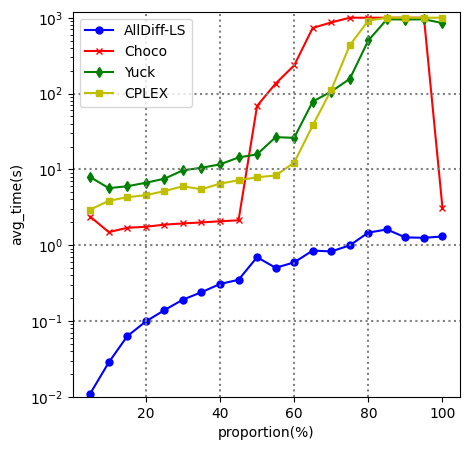

In [14]:
# 示例数据
x = [i for i in range(5, 101, 5)]
y1 = get_data('des')
y2 = get_data('choco_des')
y3 = get_data('yuck_des')
y4 = get_data('cpl_des')

plt.figure(figsize=(5, 5))
plt.plot(x, y1, marker='o', markersize='5', linestyle='-', color='b', label='AllDiff-LS')
plt.plot(x, y2, marker='x', markersize='5', linestyle='-', color='r', label='Choco')
plt.plot(x, y3, marker='d', markersize='5', linestyle='-', color='g', label='Yuck')
plt.plot(x, y4, marker='s', markersize='5', linestyle='-', color='y', label='CPLEX')

# plt.xlim(1, 1200)
plt.ylim(0.01, 1200)
plt.yscale('log')

plt.axhline(y=0.1,ls=":",c="gray")
plt.axhline(y=1,ls=":",c="gray")
plt.axhline(y=10,ls=":",c="gray")
plt.axhline(y=100,ls=":",c="gray")

plt.axvline(x=20,ls=":",c="gray")
plt.axvline(x=40,ls=":",c="gray")
plt.axvline(x=60,ls=":",c="gray")
plt.axvline(x=80,ls=":",c="gray")

# plt.title('DES')
plt.xlabel('proportion(%)')
plt.ylabel('avg_time(s)')

plt.legend()

# 显示图表
# plt.show()
plt.savefig('charts/'+ 'des' +'.pdf', bbox_inches='tight')
